In [1]:
%matplotlib widget
import numpy as np
from pathlib import Path
from glob import glob
import matplotlib.pyplot as plt
import ccdproc as ccdp
from astropy.utils.data import get_pkg_data_filename
import astropy
from astropy.stats import mad_std
import pandas as pd
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
import scipy
from scipy import ndimage
from scipy import misc

In [5]:
bias1= astropy.io.fits.open('BIAS_B11-001.fit')
bias2= astropy.io.fits.open('BIAS_B11-002.fit')
bias3= astropy.io.fits.open('BIAS_B11-003.fit')
bias4= astropy.io.fits.open('BIAS_B11-004.fit')
bias5= astropy.io.fits.open('BIAS_B11-005.fit')
bias6= astropy.io.fits.open('BIAS_B11-006.fit')
bias7= astropy.io.fits.open('BIAS_B11-007.fit')
bias8= astropy.io.fits.open('BIAS_B11-008.fit')
bias9= astropy.io.fits.open('BIAS_B11-009.fit')

dark1= astropy.io.fits.open('DARK_60sec_B11-001.fit')
dark2= astropy.io.fits.open('DARK_60sec_B11-002.fit')
dark3= astropy.io.fits.open('DARK_60sec_B11-003.fit')
dark4= astropy.io.fits.open('DARK_60sec_B11-004.fit')
dark5= astropy.io.fits.open('DARK_60sec_B11-005.fit')


flat_sloani1 =astropy.io.fits.open('FLAT_sloan_i_B11-001.fit')
flat_sloani2 =astropy.io.fits.open('FLAT_sloan_i_B11-002.fit')
flat_sloani3 =astropy.io.fits.open('FLAT_sloan_i_B11-003.fit')

flat_sloanr1 = astropy.io.fits.open('FLAT_sloan_r_B11-001.fit')
flat_sloanr2 = astropy.io.fits.open('FLAT_sloan_r_B11-002.fit')
flat_sloanr3 = astropy.io.fits.open('FLAT_sloan_r_B11-003.fit')

flat_sloang1 = astropy.io.fits.open('FLAT_sloan_g_B11-001.fit')
flat_sloang2 = astropy.io.fits.open('FLAT_sloan_g_B11-002.fit')
flat_sloang3 = astropy.io.fits.open('FLAT_sloan_g_B11-003.fit')

flatV1 = astropy.io.fits.open('FLAT_V_B11-001.fit')
flatV2 = astropy.io.fits.open('FLAT_V_B11-002.fit')
flatV3 = astropy.io.fits.open('FLAT_V_B11-003.fit')


In [6]:
master_bias= np.mean(np.array([bias1[0].data,bias2[0].data,bias3[0].data,\
bias4[0].data,bias5[0].data,bias6[0].data,bias7[0].data,bias8[0].data,bias9[0].data]), axis=0)


darklist= np.array([dark1[0].data, dark2[0].data, dark3[0].data, dark4[0].data,\
dark5[0].data]) - master_bias

master_dark = np.median(darklist, axis = 0)

darkybias= master_dark + master_bias

flat_sloanilist= np.mean(np.array([flat_sloani1[0].data, flat_sloani2[0].data, flat_sloani3[0].data]), axis=0)

flat_sloanrlist = np.mean(np.array([flat_sloanr1[0].data, flat_sloanr2[0].data, flat_sloanr3[0].data]), axis = 0)

flat_sloanglist = np.mean(np.array([flat_sloang1[0].data, flat_sloang2[0].data, flat_sloang3[0].data]), axis = 0)

flatVlist =np.mean(np.array([flatV1[0].data, flatV2[0].data, flatV3[0].data]), axis = 0)

master_flat_sloani = (flat_sloanilist - darkybias)/(np.median(flat_sloanilist - darkybias))

master_flat_V = (flatVlist -darkybias)/(np.median(flatVlist - darkybias))

master_flat_sloang = (flat_sloanglist -darkybias)/(np.median(flat_sloanglist - darkybias))


master_flat_sloanr = (flat_sloanrlist -darkybias)/(np.median(flat_sloanrlist - darkybias))

In [7]:
flat_sloani1, flat_sloani2, flat_sloani3 = (None,)*3

dark1, dark2, dark3, dark4, dark5 = (None,)*5

flatV1, flaV2, flatV3 = (None,)*3

flat_sloanr1, flat_sloanr2, flat_sloanr3= (None,)*3

flat_sloang1, flat_sloang2, flat_sloang3 = (None,)*3

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
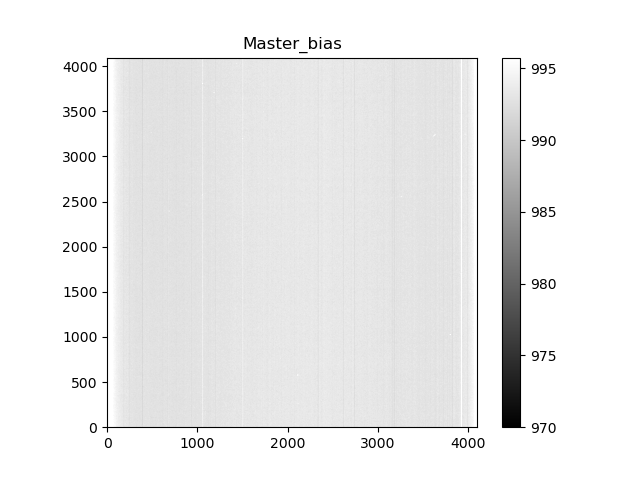

In [4]:
plt.imshow(master_bias, cmap='gray', vmin=970, vmax=np.mean(master_bias)+np.std(master_bias), origin= 'lower')
plt.title('Master_bias')
plt.colorbar()
plt.show()
plt.savefig('Master_bias')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
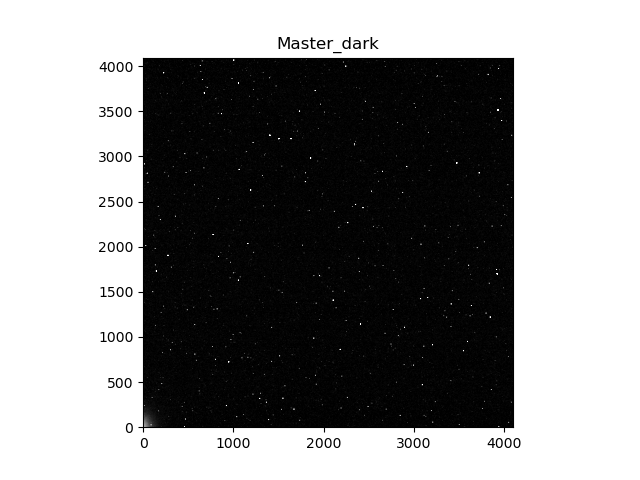

In [6]:
plt.imshow(master_dark, cmap='gray', vmin=0, vmax=np.mean(master_dark)+np.std(master_dark), origin= 'lower')
plt.title('Master_dark')
plt.show()
plt.colorbar()
plt.savefig('Master_dark normalizado')

In [8]:
np.random.seed(1)
px = np.random.randint(0,4096,size=100)
py=np.random.randint(0,4096,size=100)
rayos=np.vstack([px,py]).T
Sg1= astropy.io.fits.open('Light_PGC_12651_sloan_g_60.000secs_00000103.fit')
Sg1d= Sg1[0].data
for i in range(100):
    Sg1d[rayos[i,0],rayos[i,1]]=60000 
    Sg1d[rayos[i,0],rayos[i,1]+1]=60000
    Sg1d[rayos[i,0],rayos[i,1]+2]=60000
    Sg1d[rayos[i,0],rayos[i,1]+3]=60000
    Sg1d[rayos[i,0],rayos[i,1]-1]=60000
    Sg1d[rayos[i,0],rayos[i,1]-2]=60000
    Sg1d[rayos[i,0],rayos[i,1]-3]=60000
    
np.random.seed(2)
px2=np.random.randint(0,4096,size=100)
py2=np.random.randint(0,4096,size=100)
rayos2=np.vstack([px2,py2]).T
Sg2= astropy.io.fits.open('Light_PGC_12651_sloan_g_60.000secs_00000104.fit')
Sg2d= Sg2[0].data
for i in range(100):
    Sg2d[rayos2[i,0],rayos2[i,1]]=60000 
    Sg2d[rayos2[i,0],rayos2[i,1]+1]=60000
    Sg2d[rayos2[i,0],rayos2[i,1]+2]=60000
    Sg2d[rayos2[i,0],rayos2[i,1]+3]=60000
    Sg2d[rayos2[i,0],rayos2[i,1]-1]=60000
    Sg2d[rayos2[i,0],rayos2[i,1]-2]=60000
    Sg2d[rayos2[i,0],rayos2[i,1]-3]=60000

np.random.seed(3)
px3=np.random.randint(0,4096,size=100)
py3=np.random.randint(0,4096,size=100)
rayos3=np.vstack([px3,py3]).T
Sg3= astropy.io.fits.open('Light_PGC_12651_sloan_g_60.000secs_00000105.fit')
Sg3d= Sg3[0].data
for i in range(100):
    Sg3d[rayos3[i,0],rayos3[i,1]]=60000 
    Sg3d[rayos3[i,0],rayos3[i,1]+1]=60000
    Sg3d[rayos3[i,0],rayos3[i,1]+2]=60000
    Sg3d[rayos3[i,0],rayos3[i,1]+3]=60000
    Sg3d[rayos3[i,0],rayos3[i,1]-1]=60000
    Sg3d[rayos3[i,0],rayos3[i,1]-2]=60000
    Sg3d[rayos3[i,0],rayos3[i,1]-3]=60000

np.random.seed(4)
px4=np.random.randint(0,4096,size=100)
py4=np.random.randint(0,4096,size=100)
rayos4=np.vstack([px4,py4]).T
Si1= astropy.io.fits.open('Light_PGC_12651_sloan_i_60.000secs_00000106.fit')
Si1d= Si1[0].data
for i in range(100):
    Si1d[rayos4[i,0],rayos4[i,1]]=60000 
    Si1d[rayos4[i,0],rayos4[i,1]+1]=60000
    Si1d[rayos4[i,0],rayos4[i,1]+2]=60000
    Si1d[rayos4[i,0],rayos4[i,1]+3]=60000
    Si1d[rayos4[i,0],rayos4[i,1]-1]=60000
    Si1d[rayos4[i,0],rayos4[i,1]-2]=60000
    Si1d[rayos4[i,0],rayos4[i,1]-3]=60000
    
np.random.seed(5)
px5=np.random.randint(0,4096,size=100)
py5=np.random.randint(0,4096,size=100)
rayos5=np.vstack([px5,py5]).T
Si2= astropy.io.fits.open('Light_PGC_12651_sloan_i_60.000secs_00000107.fit')
Si2d= Si2[0].data
for i in range(100):
    Si2d[rayos5[i,0],rayos5[i,1]]=60000 
    Si2d[rayos5[i,0],rayos5[i,1]+1]=60000
    Si2d[rayos5[i,0],rayos5[i,1]+2]=60000
    Si2d[rayos5[i,0],rayos5[i,1]+3]=60000
    Si2d[rayos5[i,0],rayos5[i,1]-1]=60000
    Si2d[rayos5[i,0],rayos5[i,1]-2]=60000
    Si2d[rayos5[i,0],rayos5[i,1]-3]=60000
    
np.random.seed(6)
px6=np.random.randint(0,4096,size=100)
py6=np.random.randint(0,4096,size=100)
rayos6=np.vstack([px6,py6]).T
Si3= astropy.io.fits.open('Light_PGC_12651_sloan_i_60.000secs_00000108.fit')
Si3d= Si3[0].data
for i in range(100):
    Si3d[rayos6[i,0],rayos6[i,1]]=60000 
    Si3d[rayos6[i,0],rayos6[i,1]+1]=60000
    Si3d[rayos6[i,0],rayos6[i,1]+2]=60000
    Si3d[rayos6[i,0],rayos6[i,1]+3]=60000
    Si3d[rayos6[i,0],rayos6[i,1]-1]=60000
    Si3d[rayos6[i,0],rayos6[i,1]-2]=60000
    Si3d[rayos6[i,0],rayos6[i,1]-3]=60000
    
np.random.seed(7)
px7=np.random.randint(0,4096,size=100)
py7=np.random.randint(0,4096,size=100)
rayos7=np.vstack([px7,py7]).T
Sr1= astropy.io.fits.open('Light_PGC_12651_sloan_r_60.000secs_00000097.fit')
Sr1d= Sr1[0].data
for i in range(100):
    Sr1d[rayos7[i,0],rayos7[i,1]]=60000 
    Sr1d[rayos7[i,0],rayos7[i,1]+1]=60000
    Sr1d[rayos7[i,0],rayos7[i,1]+2]=60000
    Sr1d[rayos7[i,0],rayos7[i,1]+3]=60000
    Sr1d[rayos7[i,0],rayos7[i,1]-1]=60000
    Sr1d[rayos7[i,0],rayos7[i,1]-2]=60000
    Sr1d[rayos7[i,0],rayos7[i,1]-3]=60000
    

np.random.seed(8)
px8=np.random.randint(0,4096,size=100)
py8=np.random.randint(0,4096,size=100)
rayos8=np.vstack([px8,py8]).T
Sr2= astropy.io.fits.open('Light_PGC_12651_sloan_r_60.000secs_00000098.fit')
Sr2d= Sr2[0].data
for i in range(100):
    Sr2d[rayos8[i,0],rayos8[i,1]]=60000 
    Sr2d[rayos8[i,0],rayos8[i,1]+1]=60000
    Sr2d[rayos8[i,0],rayos8[i,1]+2]=60000
    Sr2d[rayos8[i,0],rayos8[i,1]+3]=60000
    Sr2d[rayos8[i,0],rayos8[i,1]-1]=60000
    Sr2d[rayos8[i,0],rayos8[i,1]-2]=60000
    Sr2d[rayos8[i,0],rayos8[i,1]-3]=60000

np.random.seed(9)
px9=np.random.randint(0,4096,size=100)
py9=np.random.randint(0,4096,size=100)
rayos9=np.vstack([px9,py9]).T
Sr3= astropy.io.fits.open('Light_PGC_12651_sloan_r_60.000secs_00000099.fit')
Sr3d= Sr3[0].data
for i in range(100):
    Sr3d[rayos9[i,0],rayos9[i,1]]=60000 
    Sr3d[rayos9[i,0],rayos9[i,1]+1]=60000
    Sr3d[rayos9[i,0],rayos9[i,1]+2]=60000
    Sr3d[rayos9[i,0],rayos9[i,1]+3]=60000
    Sr3d[rayos9[i,0],rayos9[i,1]-1]=60000
    Sr3d[rayos9[i,0],rayos9[i,1]-2]=60000
    Sr3d[rayos9[i,0],rayos9[i,1]-3]=60000
    
np.random.seed(10)
px10=np.random.randint(0,4096,size=100)
py10=np.random.randint(0,4096,size=100)
rayos10=np.vstack([px10,py10]).T
V1= astropy.io.fits.open('Light_PGC_12651_V_60.000secs_00000100.fit')
V1d= V1[0].data
for i in range(100):
    V1d[rayos10[i,0],rayos10[i,1]]=60000 
    V1d[rayos10[i,0],rayos10[i,1]+1]=60000
    V1d[rayos10[i,0],rayos10[i,1]+2]=60000
    V1d[rayos10[i,0],rayos10[i,1]+3]=60000
    V1d[rayos10[i,0],rayos10[i,1]-1]=60000
    V1d[rayos10[i,0],rayos10[i,1]-2]=60000
    V1d[rayos10[i,0],rayos10[i,1]-3]=60000

np.random.seed(11)
px11=np.random.randint(0,4096,size=100)
py11=np.random.randint(0,4096,size=100)
rayos11=np.vstack([px11,py11]).T
V2= astropy.io.fits.open('Light_PGC_12651_V_60.000secs_00000101.fit')
V2d= V2[0].data
for i in range(100):
    V2d[rayos11[i,0],rayos11[i,1]]=60000 
    V2d[rayos11[i,0],rayos11[i,1]+1]=60000
    V2d[rayos11[i,0],rayos11[i,1]+2]=60000
    V2d[rayos11[i,0],rayos11[i,1]+3]=60000
    V2d[rayos11[i,0],rayos11[i,1]-1]=60000
    V2d[rayos11[i,0],rayos11[i,1]-2]=60000
    V2d[rayos11[i,0],rayos11[i,1]-3]=60000 
    
np.random.seed(12)
px12=np.random.randint(0,4096,size=100)
py12=np.random.randint(0,4096,size=100)
rayos12=np.vstack([px12,py12]).T
V3= astropy.io.fits.open('Light_PGC_12651_V_60.000secs_00000102.fit')
V3d= V3[0].data
for i in range(100):
    V3d[rayos12[i,0],rayos12[i,1]]=60000 
    V3d[rayos12[i,0],rayos12[i,1]+1]=60000
    V3d[rayos12[i,0],rayos12[i,1]+2]=60000
    V3d[rayos12[i,0],rayos12[i,1]+3]=60000
    V3d[rayos12[i,0],rayos12[i,1]-1]=60000
    V3d[rayos12[i,0],rayos12[i,1]-2]=60000
    V3d[rayos12[i,0],rayos12[i,1]-3]=60000 

In [9]:
SgR1=(Sg1d-darkybias)/(master_flat_sloang)

SgR2=(Sg2d-darkybias)/(master_flat_sloang)

SgR3=(Sg3d-darkybias)/(master_flat_sloang)

SiR1=(Si1d-darkybias)/(master_flat_sloani)

SiR2=(Si2d-darkybias)/(master_flat_sloani)

SiR3=(Si3d-darkybias)/(master_flat_sloani)

SrR1=(Sr1d-darkybias)/(master_flat_sloanr)

SrR2=(Sr2d-darkybias)/(master_flat_sloanr)

SrR3=(Sr3d - darkybias)/(master_flat_sloanr)

VR1 = (V1d - darkybias)/(master_flat_V)

VR2 = (V2d - darkybias)/(master_flat_V)

VR3 = (V3d - darkybias)/(master_flat_V)

In [10]:
Sg=np.median(np.array([SgR1,SgR2,SgR3]),axis=0)
Si=np.median(np.array([SiR1,SiR2,SiR3]),axis=0)
Sr=np.median(np.array([SrR1,SrR2,SrR3]),axis=0)
V=np.median(np.array([VR1,VR2,VR3]),axis=0)

Sg[Sg <0] = 0
Sr[Sr < 0] = 0
Si[Si < 0] = 0
V[V <0] = 0

Si_raw=np.median(np.array([Si1[0].data, Si2[0].data, Si3[0].data]), axis=0)
Sg_raw = np.median(np.array([Sg1[0].data, Sg2[0].data, Sg3[0].data]), axis=0)
Sr_raw = np.median(np.array([Sr1[0].data, Sr2[0].data, Sr3[0].data]), axis=0)
V_raw = np.median(np.array([V1[0].data, V2[0].data, V3[0].data]), axis=0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
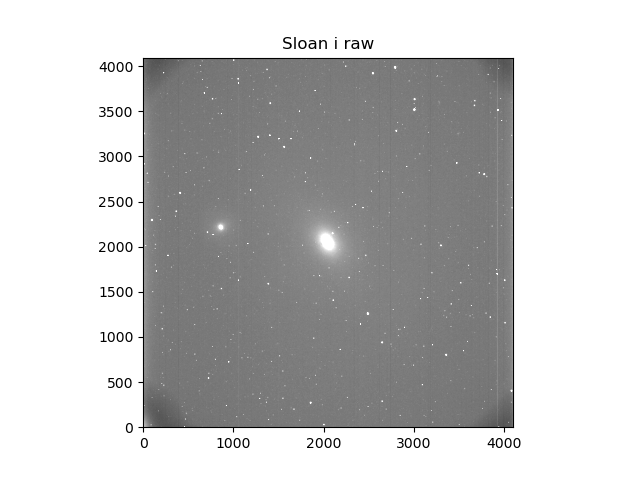

In [8]:
plt.imshow(Si_raw, cmap='gray', vmin=975, vmax= np.mean(Si_raw)+ np.std(Si_raw), origin='lower')
plt.title('Sloan i raw')
plt.savefig('Sloan i raw')
plt.close()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
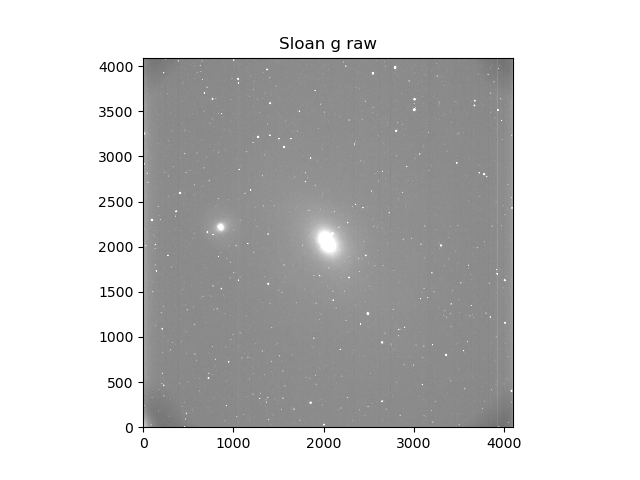

In [9]:
plt.imshow(Sg_raw, cmap='gray', vmin=960, vmax= np.mean(Sg_raw)+ np.std(Sg_raw), origin='lower')
plt.title('Sloan g raw')
plt.savefig('Sloan g raw')
plt.close()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
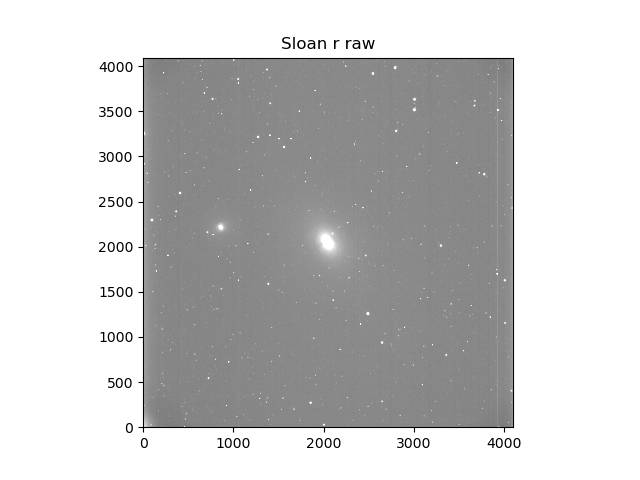

In [10]:
plt.imshow(Sr_raw, cmap='gray', vmin=960, vmax= np.mean(Sr_raw)+ np.std(Sr_raw), origin='lower')
plt.title('Sloan r raw')
plt.savefig('Sloan r raw')
plt.close()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
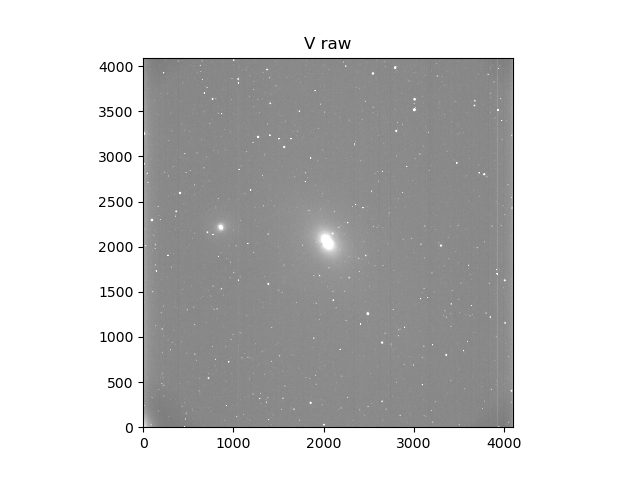

In [14]:
plt.imshow(V_raw, cmap='gray', vmin=960, vmax= np.mean(V_raw)+ np.std(V_raw), origin='lower')
plt.title('V raw')
plt.savefig('V raw')
plt.close()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
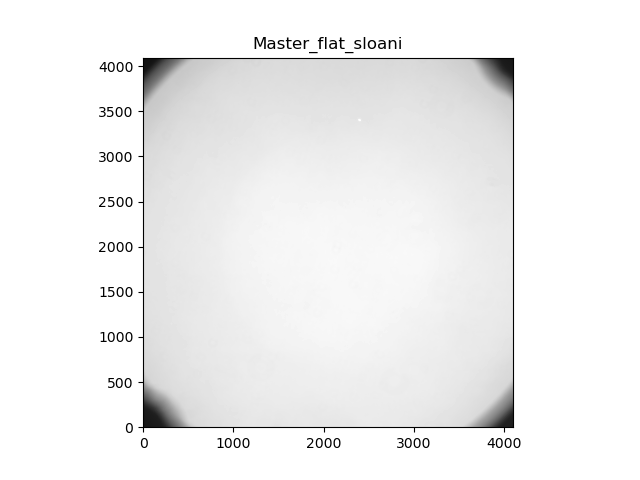

In [9]:
plt.imshow(master_flat_sloani, cmap='gray', vmin=0, vmax=np.mean(master_flat_sloani)+np.std(master_flat_sloani), origin='lower')
plt.title('Master_flat_sloani')
plt.savefig('Master_flat_sloani normalizado')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
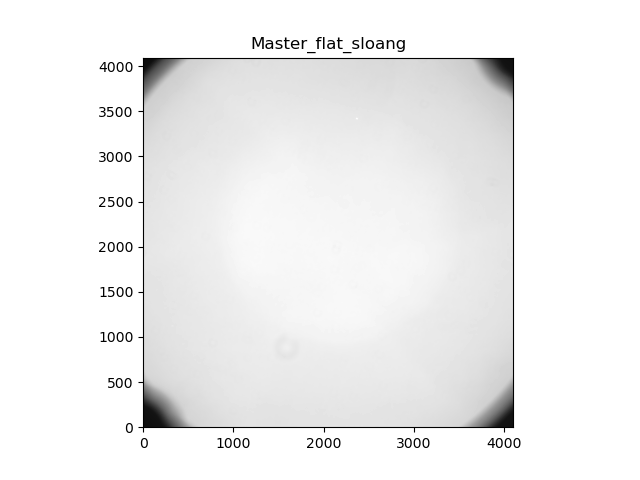

In [8]:
plt.imshow(master_flat_sloang, cmap='gray', vmin = 0, vmax=np.mean(master_flat_sloang)+np.std(master_flat_sloang), origin='lower')
plt.title('Master_flat_sloang')
plt.savefig('Master_flat_sloang normalizado')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
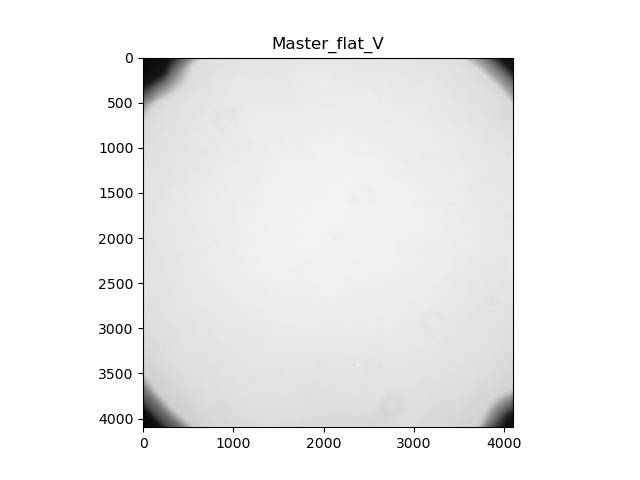

In [10]:
plt.imshow(master_flat_V, cmap='gray', vmin = 0, vmax=np.mean(master_flat_sloang)+np.std(master_flat_sloang))
plt.title('Master_flat_V')
plt.savefig('Master_flat_V normalizado')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
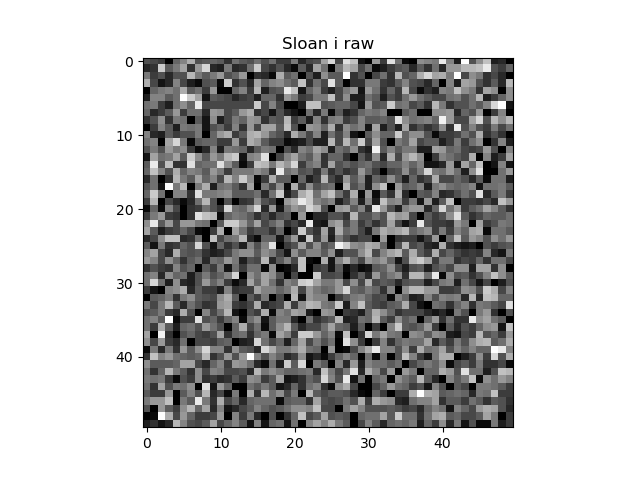

In [43]:
Pixeles1 = Sg[Sg < np.mean(Sg[2800:2850, 2800:2850])]
plt.imshow(Sg[2800:2850, 2800:2850], cmap='gray', vmin=0, vmax=np.mean(Sg)+np.std(Sg))
plt.savefig('Pixel 2800 a 2850 en eje xy')
plt.show()

In [26]:
BgSg = np.mean(Pixeles1)
print('Nivel de background para el filtro Sg', BgSg)

Nivel de background para el filtro Sg 978.1257715860476


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
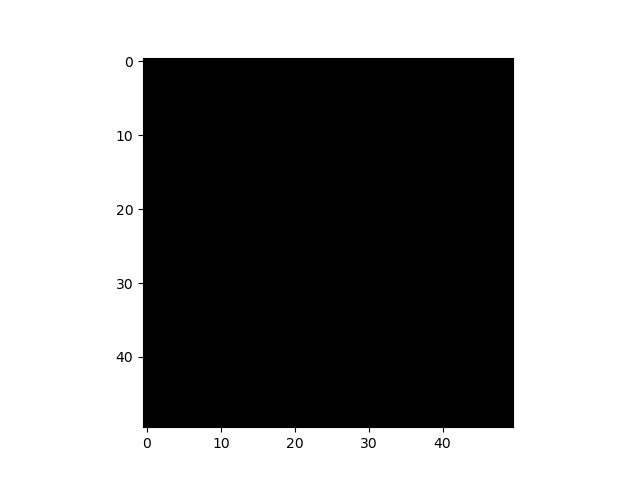

In [28]:
Pixeles2 = Sr[Sr < np.mean(Sr[2800:2850, 2800:2850])]
plt.imshow(Sr[2800:2850, 2800:2850], cmap='gray', vmin=0, vmax=np.mean(Sr)+np.std(Sr))
plt.show()

In [58]:
BgSr =np.mean(Pixeles2)
print('Nivel de background para el filtro Sloan r', BgSr)

Nivel de background para el filtro Sloan r 1.325657662603195


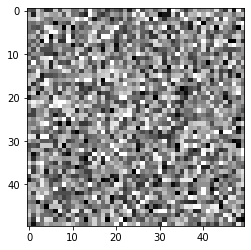

In [59]:
Pixeles3 = Si[Si < np.mean(Si[2800:2850, 2800:2850])]
plt.imshow(Si[2800:2850, 2800:2850], cmap='gray', vmin=0, vmax=np.mean(Si)+np.std(Si))
plt.show()

In [60]:
BgSi = np.mean(Pixeles3)
print('Nivel de background para el filtro Sloan i:', BgSi)

Nivel de background para el filtro Sloan i: 7.4651173946285345


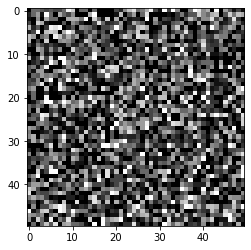

In [61]:
Pixeles4 = V[V < np.mean(Sr[2800:2850, 2800:2850])]
plt.imshow(Sr[2800:2850, 2800:2850], cmap='gray', vmin=0, vmax=np.mean(V)+np.std(V))
plt.show()

In [62]:
BgV = np.mean(Pixeles4)
print('Nivel de background para el filtro Sloan i:', BgSi)

Nivel de background para el filtro Sloan i: 7.4651173946285345


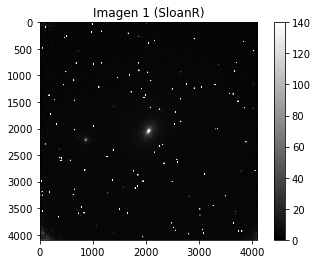

In [74]:
plt.imshow(SrR1,cmap='gray',vmin=0, vmax=140)
plt.title('Imagen 1 (SloanR)') #con rayos cosmicos
plt.colorbar()
plt.savefig('SloanR1 con rayos')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
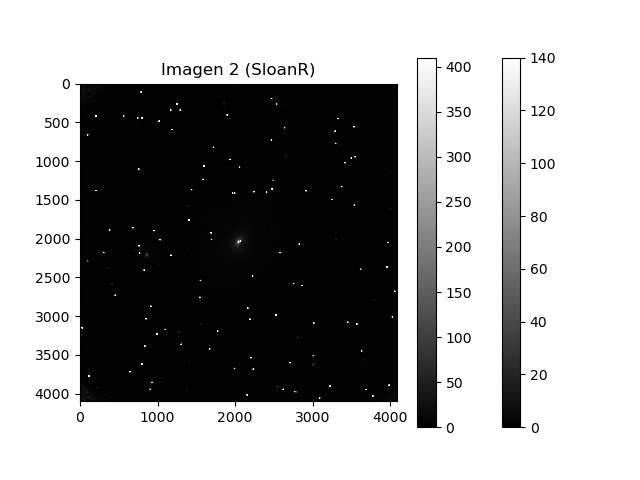

In [12]:
plt.imshow(SrR2,cmap='gray',vmin=0,vmax=np.mean(SrR2)+np.std(SrR2))
plt.title('Imagen 2 (SloanR)') #con rayos cosmicos
plt.colorbar()
plt.savefig('SrR2 con rayos cosmicos')
plt.show()

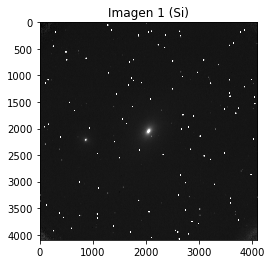

<Figure size 432x288 with 0 Axes>

In [59]:
plt.imshow(SiR1,cmap='gray',vmin=0,vmax=140)
plt.title('Imagen 1 (Si)') #con rayos cosmicos
plt.show()
plt.savefig('SiR1')

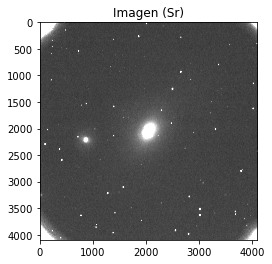

<Figure size 432x288 with 0 Axes>

In [73]:
plt.imshow(Sr,cmap='gray',vmin=0,vmax=np.mean(Sr)+np.std(Sr))
plt.title('Imagen (Sr)')
plt.show()
plt.savefig('Imagen Sr')

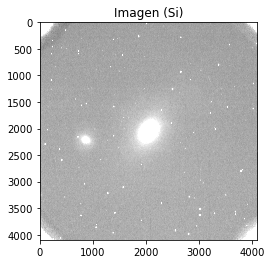

<Figure size 432x288 with 0 Axes>

In [75]:
plt.imshow(Si,cmap='gray',vmin=0,vmax=np.mean(Sr)+np.std(Sr))
plt.title('Imagen (Si)')
plt.show()
plt.savefig('Imagen Si')

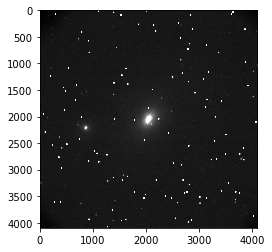

In [77]:
V1dredux = (V1d - darkybias)/master_flat_V #plot de unas imagenes con filtro B y agregandole rayos cosmicos
plt.imshow(V1dredux, cmap='gray', vmin=0, vmax=50)
plt.show()

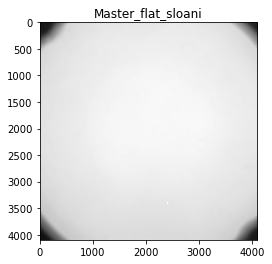

In [25]:
plt.imshow(master_flat_sloani, cmap='gray', vmin=0, vmax=np.mean(master_flat_sloani)+np.std(master_flat_sloani))
plt.title('Master_flat_sloani')
plt.savefig('Master_flat_sloani normalizado')
plt.show()

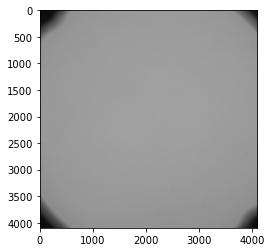

In [35]:
plt.imshow(flat_sloanrlist, cmap='gray', vmin=0)
plt.savefig('flat_sloanr sin normalizar')
plt.show()

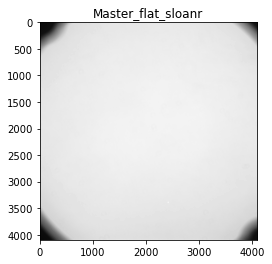

In [37]:
plt.imshow(master_flat_sloanr, cmap='gray', vmin=0, vmax=np.mean(master_flat_sloanr)+np.std(master_flat_sloanr))
plt.title('Master_flat_sloanr')
plt.savefig('Master_flat_sloanr normalizado')
plt.show()

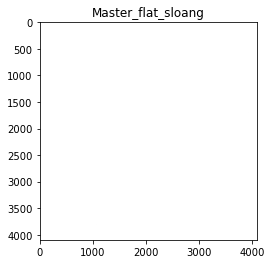

In [49]:
plt.imshow(master_flat_sloang, cmap='gray', vmin=0, vmax=np.mean(master_flat_sloang)+np.std(master_flat_sloang))
plt.title('Master_flat_sloang')
plt.savefig('Master_flat_sloang normalizado')
plt.show()

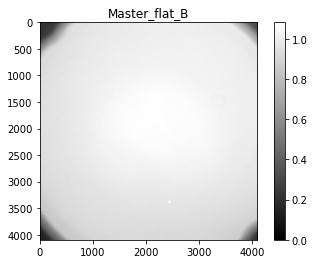

In [53]:
plt.imshow(master_flat_B, cmap='gray', vmin=0, vmax=np.mean(master_flat_B)+np.std(master_flat_B))
plt.title('Master_flat_B')
plt.colorbar()
plt.savefig('Master_flat_B normalizado')
plt.show()

In [11]:
## Definimos nuestro kernel de boxcar.
boxcar=(np.vstack([np.ones(3),np.ones(3),np.ones(3)]).T)/6

In [47]:
#Aplicamos 3 filtros diferentes a cada imagen profunda (Gaussiano,Laplaciano y Boxcar)
gaussSi=scipy.ndimage.gaussian_filter(Si,5)
laplaceSi=scipy.ndimage.uniform_filter(Si)
boxcarSi=scipy.ndimage.convolve(Si,boxcar)

In [48]:
gaussSr=scipy.ndimage.gaussian_filter(Sr,5)
laplaceSr=scipy.ndimage.uniform_filter(Sr)
boxcarSr=scipy.ndimage.convolve(Sr,boxcar)

In [50]:
gaussSg=scipy.ndimage.gaussian_filter(Sg,5)
laplaceSg=scipy.ndimage.uniform_filter(Sg)
boxcarSg=scipy.ndimage.convolve(Sg,boxcar)

In [52]:
gaussV=scipy.ndimage.gaussian_filter(V,5)
laplaceV=scipy.ndimage.uniform_filter(V)
boxcarV=scipy.ndimage.convolve(V,boxcar)

In [53]:
#Generamos 2 veriones sharpened de cada imagen
unsharp_g_V=2*V-gaussV
unsharp_l_V=V-laplaceV

unsharp_g_Si=2*Si-gaussSi
unsharp_l_Si=Si-laplaceSi

unsharp_g_Sr=2*Sr-gaussSr
unsharp_l_Sr=Sr-laplaceSr

unsharp_g_Sg=2*Sg-gaussSg
unsharp_l_Sg=Sg-laplaceSg

In [54]:
#Sharpened para el filtro B
plt.imshow(unsharp_g_V[500:3000, 500:3000], cmap='gray', vmin=0, vmax=np.mean(unsharp_g_V)+np.std(unsharp_g_V))
plt.title('sharpened 1 V')
plt.colorbar()
plt.savefig('Sharpened 1V')
plt.close()

plt.imshow(unsharp_l_V[500:3000, 500:3000], cmap='gray', vmin=0, vmax=np.mean(unsharp_l_V)+np.std(unsharp_l_V))
plt.title('sharpened 2 V')
plt.colorbar()
plt.savefig('Sharpened 2V')
plt.close()


#Sharpened para el filtro Sloan i
plt.imshow(unsharp_g_Si[500:3000, 500:3000], cmap='gray', vmin=0, vmax=np.mean(unsharp_g_Si)+np.std(unsharp_g_Si))
plt.title('sharpened 1 Sloan i')
plt.colorbar()
plt.savefig('Sharpened 1Sloan i')
plt.close()

plt.imshow(unsharp_l_Si[500:3000, 500:3000], cmap='gray', vmin=0, vmax=np.mean(unsharp_l_Si)+np.std(unsharp_l_Si))
plt.title('sharpened 2 Sloan i')
plt.colorbar()
plt.savefig('Sharpened 2Sloan i')
plt.close()


#sharpened para el filtro Sloan r
plt.imshow(unsharp_g_Sr[500:3000, 500:3000], cmap='gray', vmin=0, vmax=np.mean(unsharp_g_Sr)+np.std(unsharp_g_Sr))
plt.title('sharpened 1 Sloan r')
plt.colorbar()
plt.savefig('Sharpened 1Sloan r')
plt.close()

plt.imshow(unsharp_l_Sr[500:3000, 500:3000], cmap='gray', vmin=0, vmax=np.mean(unsharp_l_Sr)+np.std(unsharp_l_Sr))
plt.title('sharpened 2 Sloan r')
plt.colorbar()
plt.savefig('Sharpened 2Sloan r')
plt.close()

plt.imshow(unsharp_g_Sg[500:3000, 500:3000], cmap='gray', vmin=0, vmax=np.mean(unsharp_g_Sg)+np.std(unsharp_g_Sg))
plt.title('sharpened 1 Sloan g')
plt.colorbar()
plt.savefig('Sharpened 1Sloan g')
plt.close()

plt.imshow(unsharp_l_Sg[500:3000, 500:3000], cmap='gray', vmin=0, vmax=np.mean(unsharp_l_Sg)+np.std(unsharp_l_Sg))
plt.title('sharpened 2 Sloan g')
plt.colorbar()
plt.savefig('Sharpened 2Sloan g')
plt.close()

In [21]:
plt.imshow(unsharp_g_V[1500:2500, 1500:2500], cmap='gray', vmin=0, vmax=np.mean(unsharp_g_V)+np.std(unsharp_g_V))
plt.title('sharpened 1 V')
plt.colorbar()
plt.savefig('Sharpened 1V')
plt.close()

In [18]:
#Definimos nuestros kernels arbitrarios
Filtro1=np.array([[3,-2,3],[-2,1,-2],[3,-2,3]])
Filtro2=np.array([[1,1,1],[1,-9,1],[1,1,1]])
Filtro3=np.array([[3,3,3],[3,0,3],[3,3,3]])

In [19]:
#Aplicamos estos filtros inventados en cada imagen
f1V=scipy.ndimage.convolve(V,Filtro1)
f2V=scipy.ndimage.convolve(V,Filtro2)
f3V=scipy.ndimage.convolve(V,Filtro3)

f1Si=scipy.ndimage.convolve(Si,Filtro1)
f2Si=scipy.ndimage.convolve(Si,Filtro2)
f3Si=scipy.ndimage.convolve(Si,Filtro3)

f1Sr=scipy.ndimage.convolve(Sr,Filtro1)
f2Sr=scipy.ndimage.convolve(Sr,Filtro2)
f3Sr=scipy.ndimage.convolve(Sr,Filtro3)

f1Sg=scipy.ndimage.convolve(Sg,Filtro1)
f2Sg=scipy.ndimage.convolve(Sg,Filtro2)
f3Sg=scipy.ndimage.convolve(Sg,Filtro3)

In [23]:
#Finalmente obtenemos una imagen rgb a color
rgb= make_lupton_rgb(Si,Sr,Sg,stretch=130, Q=5)
plt.imshow(rgb[1800:2300, 1800:2300], origin='lower')
plt.colorbar()
plt.savefig('rgb3.png',dpi='figure')
plt.close()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
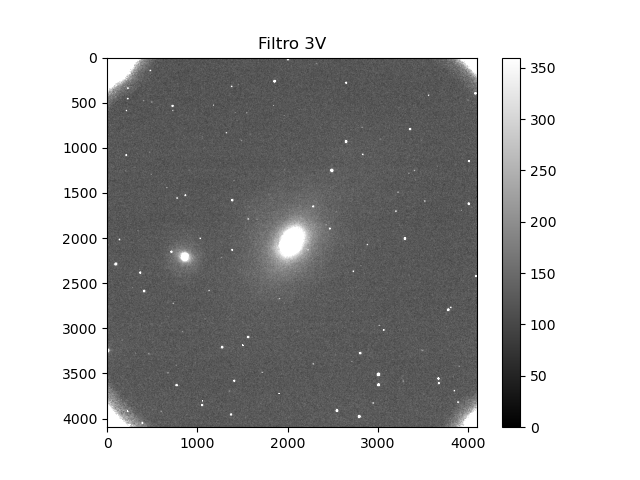

In [25]:
#plot de los filtros para B
plt.imshow(f1V,cmap='gray',vmin=0,vmax=np.mean(f1V)+np.std(f1V))
plt.title('Filtro 1V')
plt.colorbar()
plt.savefig('Filtro 1V')
plt.close()

plt.imshow(f2V,cmap='gray',vmin=-40,vmax=np.mean(f2V)+np.std(f2V))
plt.title('Filtro 2V')
plt.colorbar()
plt.savefig('Filtro 2V')
plt.close()

plt.imshow(f3V,cmap='gray',vmin=0,vmax=np.mean(f3V)+np.std(f3V))
plt.title('Filtro 3V')
plt.colorbar()
plt.savefig('Filtro 3V')

In [32]:
#plot de los filtros para Sloan i
plt.imshow(f1Si,cmap='gray',vmin=0,vmax=np.mean(f1Si)+np.std(f1Si))
plt.title('Filtro 1 Sloan i')
plt.colorbar()
plt.savefig('Filtro 1Sloan i')
plt.close()

plt.imshow(f2Si,cmap='gray',vmin=-50,vmax=np.mean(f2Si)+np.std(f2Si))
plt.title('Filtro 2 Sloan i')
plt.colorbar()
plt.savefig('Filtro 2Sloan i')
plt.close()

plt.imshow(f3Si,cmap='gray',vmin=0,vmax=np.mean(f3Si)+np.std(f3Si))
plt.title('Filtro 3Sloan i')
plt.colorbar()
plt.savefig('Filtro 3Sloan i')
plt.close()

In [73]:
plt.imshow(f1Sg,cmap='gray',vmin=0,vmax=np.mean(f1Sg)+np.std(f1Sg))
plt.title('Filtro 1 Sloan g')
plt.colorbar()
plt.savefig('Filtro 1Sloan g')
plt.close()

plt.imshow(f2Sg,cmap='gray',vmin=-50,vmax=np.mean(f2Sg)+np.std(f2Sg))
plt.title('Filtro 2 Sloan g')
plt.colorbar()
plt.savefig('Filtro 2Sloan g')
plt.close()

plt.imshow(f3Sg,cmap='gray',vmin=0,vmax=np.mean(f3Sg)+np.std(f3Sg))
plt.title('Filtro 3Sloan g')
plt.colorbar()
plt.savefig('Filtro 3Sloan g')
plt.close()

In [75]:
plt.imshow(f1Sr,cmap='gray',vmin=0,vmax=np.mean(f1Sr)+np.std(f1Sr))
plt.title('Filtro 1 Sloan r')
plt.colorbar()
plt.savefig('Filtro 1Sloan r')
plt.close()

plt.imshow(f2Sr, cmap='gray',vmin=-50,vmax=np.mean(f2Sr)+np.std(f2Sr))
plt.title('Filtro 2 Sloan r')
plt.colorbar()
plt.savefig('Filtro 2Sloan r')
plt.close()

plt.imshow(f3Sr,cmap='gray',vmin=0,vmax=np.mean(f3Sr)+np.std(f3Sr))
plt.title('Filtro 3 Sloan r')
plt.colorbar()
plt.savefig('Filtro 3Sloan r')
plt.close()

In [58]:
plt.imshow(gaussV,cmap='gray',vmin=0,vmax=np.mean(gaussV)+np.std(gaussV))
plt.title('gaussV')
plt.colorbar()
plt.savefig('gaussV')
plt.close()

In [59]:
plt.imshow(laplaceV,cmap='gray',vmin=0,vmax=np.mean(laplaceV)+np.std(laplaceV))
plt.title('laplaceV')
plt.colorbar()
plt.savefig('laplaceV')
plt.close()

In [60]:
plt.imshow(boxcarV,cmap='gray',vmin=0,vmax=np.mean(boxcarV)+np.std(boxcarV))
plt.title('boxcarV')
plt.colorbar()
plt.savefig('boxcarV')
plt.close()

In [61]:
plt.imshow(gaussSi,cmap='gray',vmin=0,vmax=np.mean(gaussSi)+np.std(gaussSi))
plt.title('gaussSi')
plt.colorbar()
plt.savefig('gaussSi')
plt.close()

In [70]:
plt.imshow(laplaceSi,cmap='gray',vmin=0,vmax=np.mean(laplaceSi)+np.std(laplaceSi))
plt.title('laplace Sloan i')
plt.colorbar()
plt.savefig('laplace Sloan i')
plt.close()

In [63]:
plt.imshow(boxcarSi,cmap='gray',vmin=0,vmax=np.mean(boxcarSi)+np.std(boxcarSi))
plt.title('boxcarSi')
plt.colorbar()
plt.savefig('boxcarSi')
plt.close()

In [64]:
plt.imshow(gaussSr,cmap='gray',vmin=0,vmax=np.mean(gaussSr)+np.std(gaussSr))
plt.title('gauss Sloan r')
plt.colorbar()
plt.savefig('gaussSr')
plt.close()

In [71]:
plt.imshow(laplaceSr,cmap='gray',vmin=0,vmax=np.mean(laplaceSr)+np.std(laplaceSr))
plt.title('laplace Sloan i')
plt.colorbar()
plt.savefig('laplace Sloan r')
plt.close()

In [66]:
plt.imshow(boxcarSr,cmap='gray',vmin=0,vmax=np.mean(boxcarSr)+np.std(boxcarSr))
plt.title('boxcar Sloan r')
plt.colorbar()
plt.savefig('boxcarSr')
plt.close()

In [67]:
plt.imshow(gaussSg,cmap='gray',vmin=0,vmax=np.mean(gaussSg)+np.std(gaussSg))
plt.title('gauss Sloan g')
plt.colorbar()
plt.savefig('gaussSg')
plt.close()

In [68]:
plt.imshow(laplaceSg,cmap='gray',vmin=0,vmax=np.mean(laplaceSg)+np.std(laplaceSg))
plt.title('laplace Sloan g')
plt.colorbar()
plt.savefig('laplace Sloan g')
plt.close()

In [69]:
plt.imshow(boxcarSg,cmap='gray',vmin=0,vmax=np.mean(boxcarSg)+np.std(boxcarSg))
plt.title('boxcar Sloan g')
plt.colorbar()
plt.savefig('boxcarSg')
plt.close()